In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-dataset/diabetes.csv


# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# !pip install missingno
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

# Load Dataset

In [3]:
df = pd.read_csv("/kaggle/input/diabetes-dataset/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [5]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
# make all columns uppercase
df.columns= [col.upper() for col in df.columns]
df.columns

Index(['PREGNANCIES', 'GLUCOSE', 'BLOODPRESSURE', 'SKINTHICKNESS', 'INSULIN', 'BMI', 'DIABETESPEDIGREEFUNCTION', 'AGE', 'OUTCOME'], dtype='object')

In [9]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    

    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]
    num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int64", "float64"]]
    cat_but_car = [col for col in df.columns if
                       df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in df.columns if df[col].dtypes in ["int64", "float64"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

#cat_cols=[ col for col in cat_cols if col != "OUTCOME"]

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


In [10]:
# categorical variable analysis
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()
cat_summary(df, "OUTCOME")

         OUTCOME  Ratio
OUTCOME                
0            500 65.104
1            268 34.896
##########


In [11]:
# the analysis of numeric columns with target.
def target_analiz_num(dataframe, num_cols, target):
    print(dataframe.groupby(target)[num_cols].mean())
    print("##########")
    
for col in num_cols:
    target_analiz_num(df, col, "OUTCOME")

OUTCOME
0   3.298
1   4.866
Name: PREGNANCIES, dtype: float64
##########
OUTCOME
0   109.980
1   141.257
Name: GLUCOSE, dtype: float64
##########
OUTCOME
0   68.184
1   70.825
Name: BLOODPRESSURE, dtype: float64
##########
OUTCOME
0   19.664
1   22.164
Name: SKINTHICKNESS, dtype: float64
##########
OUTCOME
0    68.792
1   100.336
Name: INSULIN, dtype: float64
##########
OUTCOME
0   30.304
1   35.143
Name: BMI, dtype: float64
##########
OUTCOME
0   0.430
1   0.550
Name: DIABETESPEDIGREEFUNCTION, dtype: float64
##########
OUTCOME
0   31.190
1   37.067
Name: AGE, dtype: float64
##########


In [12]:
# corelation  
corr = df.corr()
corr_df= corr.unstack().sort_values(ascending=False)

In [13]:
corr_df= pd.DataFrame(corr_df)
corr_df.reset_index(inplace=True)
corr_df.columns=["colon1","colon2","corr"]

In [14]:
corr_df[(corr_df["colon1"]=="OUTCOME") & (corr_df["corr"].apply(lambda x: x!=1))].head(10)

,colon1,colon2,corr
12,OUTCOME,GLUCOSE,0.467
20,OUTCOME,BMI,0.293
28,OUTCOME,AGE,0.238
29,OUTCOME,PREGNANCIES,0.222
41,OUTCOME,DIABETESPEDIGREEFUNCTION,0.174
52,OUTCOME,INSULIN,0.131
57,OUTCOME,SKINTHICKNESS,0.075
59,OUTCOME,BLOODPRESSURE,0.065


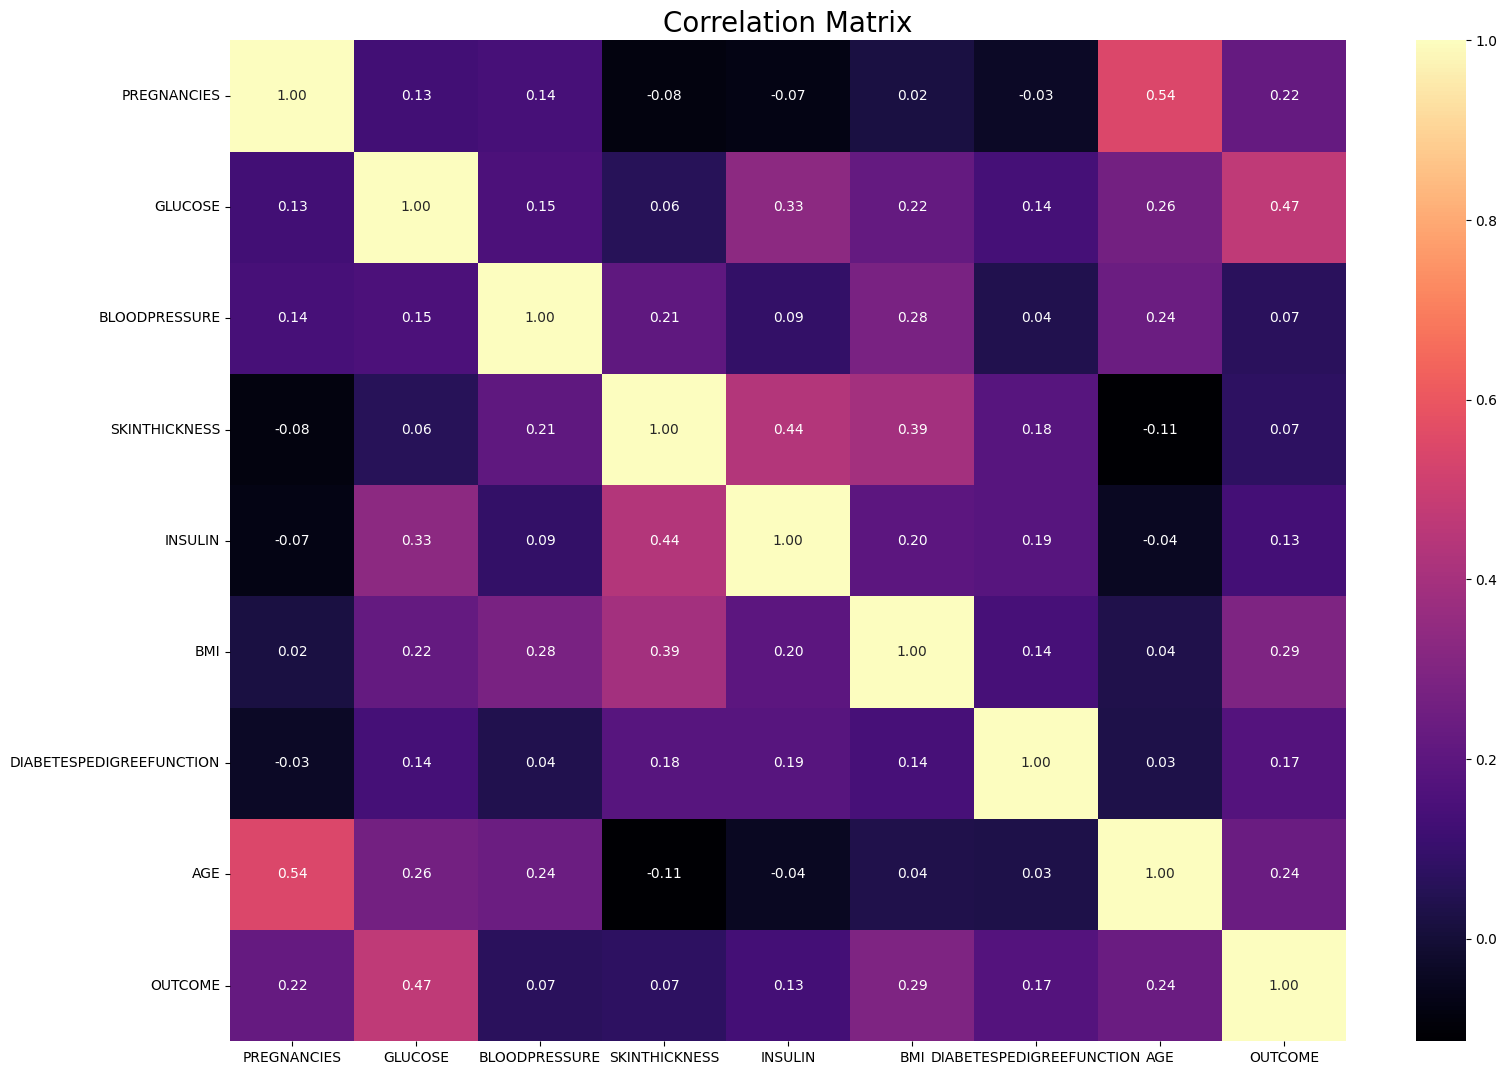

In [15]:
# Korelasyon Matrisi
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show(block=True)

# Base Model

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
y = df["OUTCOME"]
X = df.drop("OUTCOME", axis=1) # axis:1 stn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")

Accuracy: 0.77


# Feature Engineering 

In [17]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
PREGNANCIES,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
GLUCOSE,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BLOODPRESSURE,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SKINTHICKNESS,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
INSULIN,768.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
DIABETESPEDIGREEFUNCTION,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
AGE,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000


In [18]:
df.isnull().sum()

PREGNANCIES                 0
GLUCOSE                     0
BLOODPRESSURE               0
SKINTHICKNESS               0
INSULIN                     0
BMI                         0
DIABETESPEDIGREEFUNCTION    0
AGE                         0
OUTCOME                     0
dtype: int64

In [19]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")  # bir boşluk bırakmak için \n koyuyoruz

    if na_name:
        return na_columns


missing_values_table(df, True)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


[]

In [20]:
df.groupby("OUTCOME")["INSULIN"].mean()

OUTCOME
0    68.792
1   100.336
Name: INSULIN, dtype: float64

In [21]:
zero_columns = ["GLUCOSE","SKINTHICKNESS","INSULIN","BMI","BLOODPRESSURE"]
for col in zero_columns:
    df[col]= df[col].apply(lambda x: np.nan if x==0 else x)

In [22]:
for col in zero_columns:
    df[col]=df[col].fillna(df.groupby("OUTCOME")[col].transform("mean"))

# Outlier Detection

In [23]:
# outlier analysis - threshold value determination
def outlier_th(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit
outlier_th(df, "PREGNANCIES")

(-6.5, 13.5)

In [24]:
# look at the variables if there is an outlier or not
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_th(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

for col in num_cols:
    print(col, check_outlier(df, col))

PREGNANCIES True
GLUCOSE False
BLOODPRESSURE True
SKINTHICKNESS True
INSULIN True
BMI True
DIABETESPEDIGREEFUNCTION True
AGE True


In [25]:
# we are gonna change the value with an up_limit or low_limit if they are bigger or lower than the up limit or low_limit 
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_th(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

for col in num_cols:
    replace_with_thresholds(df, col)

for col in num_cols:
    print(col, check_outlier(df, col))

PREGNANCIES False
GLUCOSE False
BLOODPRESSURE False
SKINTHICKNESS False
INSULIN False
BMI False
DIABETESPEDIGREEFUNCTION False
AGE False


/tmp/ipykernel_18/491114093.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-6.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
/tmp/ipykernel_18/491114093.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit


In [26]:
# new features
df.loc[(df['AGE'] >= 18) & (df['AGE'] < 30) , 'NEW_AGE_CAT'] = "young"
df.loc[(df['AGE'] >= 30) & (df['AGE'] < 45) , 'NEW_AGE_CAT'] = "mature"
df.loc[(df['AGE'] >= 45) & (df['AGE'] < 65) , 'NEW_AGE_CAT'] = "middle"
df.loc[(df['AGE'] >= 65) , 'NEW_AGE_CAT'] = "old"

df.loc[(df['BMI'] <= 18), 'NEW_BMI_CAT'] ="weak"
df.loc[(df['BMI'] >= 18.5) & (df['BMI'] < 25) , 'NEW_BMI_CAT'] ="normal"
df.loc[(df['BMI'] >= 25) & (df['BMI'] < 30) , 'NEW_BMI_CAT'] ="overweight"
df.loc[(df['BMI'] >= 30), 'NEW_BMI_CAT'] ="obese"

df.loc[(df["GLUCOSE"] < 70) & ((df["AGE"] >= 21) & (df["AGE"] < 50)), "NEW_AGE_GLUCOSE_CAT"] = "low"
df.loc[((df["GLUCOSE"] >= 70) & (df["GLUCOSE"] < 100)) & ((df["AGE"] >= 21) & (df["AGE"] < 50)), "NEW_AGE_GLUCOSE_CAT"] = "normal"
df.loc[(df["GLUCOSE"] > 140) & (df["AGE"] >= 50), "NEW_AGE_GLUCOSE_CAT"] = "high"

df.loc[df["INSULIN"] <= 120,"INSULIN_NEW_CAT"]="normal"
df.loc[df["INSULIN"] >= 120, "INSULIN_NEW_CAT"]="anormal"


In [27]:
df.groupby("INSULIN_NEW_CAT").agg({"OUTCOME": ["mean","count"]})


OUTCOME      
                   mean count
INSULIN_NEW_CAT              
anormal           0.414   584
normal            0.141   184

In [28]:
df["GLUCOSE_INSULIN"]=df["GLUCOSE"]*df["INSULIN"]
df["INSULIN_BMI"]=df["INSULIN"]*df["BMI"]
df["GLUCOSE_BLOODPRESSURE"]= df["GLUCOSE"]* df["BLOODPRESSURE"]
df["INSULIN_BLOODPRESSURE"]= df["INSULIN"]*df["BLOODPRESSURE"]

In [29]:
#age-bmı

df.loc[(df["NEW_AGE_CAT"]=="mature") & (df["NEW_BMI_CAT"]=="Normal Weight"),"AGE_BMI_CAT"]="matureNormalWeight"
df.loc[(df["NEW_AGE_CAT"]=="mature") & (df["NEW_BMI_CAT"]=="Overweight"),"AGE_BMI_CAT"]="matureOverweight"
df.loc[(df["NEW_AGE_CAT"]=="mature") & (df["NEW_BMI_CAT"]=="Obese"),"AGE_BMI_CAT"]="matureObese"
df.loc[(df["NEW_AGE_CAT"]=="senior") & (df["NEW_BMI_CAT"]=="Normal Weight"),"AGE_BMI_CAT"]="seniorNormalWeight"
df.loc[(df["NEW_AGE_CAT"]=="senior") & (df["NEW_BMI_CAT"]=="Overweight"),"AGE_BMI_CAT"]="seniorOverweight"
df.loc[(df["NEW_AGE_CAT"]=="senior") & (df["NEW_BMI_CAT"]=="Obese"),"AGE_BMI_CAT"]="seniorObese"

In [30]:
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_AGE_CAT,NEW_BMI_CAT,NEW_AGE_GLUCOSE_CAT,INSULIN_NEW_CAT,GLUCOSE_INSULIN,INSULIN_BMI,GLUCOSE_BLOODPRESSURE,INSULIN_BLOODPRESSURE,AGE_BMI_CAT
0,6.000,148.000,72.000,35.000,206.846,33.600,0.627,50.000,1,middle,obese,high,anormal,30613.231,6950.031,10656.000,14892.923,NaN
1,1.000,85.000,66.000,29.000,130.288,26.600,0.351,31.000,0,mature,overweight,normal,anormal,11074.470,3465.658,5610.000,8599.000,NaN
2,8.000,183.000,64.000,33.000,206.846,23.300,0.672,32.000,1,mature,normal,NaN,anormal,37852.846,4819.515,11712.000,13238.154,NaN
3,1.000,89.000,66.000,23.000,94.000,28.100,0.167,21.000,0,young,overweight,normal,normal,8366.000,2641.400,5874.000,6204.000,NaN
4,0.000,137.000,40.000,35.000,168.000,43.100,1.200,33.000,1,mature,obese,NaN,anormal,23016.000,7240.800,5480.000,6720.000,NaN


In [31]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

cat_cols=[ col for col in cat_cols if col != "OUTCOME"]

Observations: 768
Variables: 18
cat_cols: 6
num_cols: 12
cat_but_car: 0
num_but_cat: 1


In [32]:
# label encoder
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]

for col in binary_cols:
    df = label_encoder(df,col)

In [33]:
# one hot encoder
def one_hot_encoding(dataframe, cat_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=cat_cols, drop_first=drop_first)
    return dataframe

cat_cols = [col for col in cat_cols if col not in binary_cols]

df = one_hot_encoding(df, cat_cols, drop_first=True)

In [34]:
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,INSULIN_NEW_CAT,GLUCOSE_INSULIN,INSULIN_BMI,GLUCOSE_BLOODPRESSURE,INSULIN_BLOODPRESSURE,NEW_AGE_CAT_middle,NEW_AGE_CAT_old,NEW_AGE_CAT_young,NEW_BMI_CAT_obese,NEW_BMI_CAT_overweight,NEW_AGE_GLUCOSE_CAT_low,NEW_AGE_GLUCOSE_CAT_normal
0,6.000,148.000,72.000,35.000,206.846,33.600,0.627,50.000,1,0,30613.231,6950.031,10656.000,14892.923,True,False,False,True,False,False,False
1,1.000,85.000,66.000,29.000,130.288,26.600,0.351,31.000,0,0,11074.470,3465.658,5610.000,8599.000,False,False,False,False,True,False,True
2,8.000,183.000,64.000,33.000,206.846,23.300,0.672,32.000,1,0,37852.846,4819.515,11712.000,13238.154,False,False,False,False,False,False,False
3,1.000,89.000,66.000,23.000,94.000,28.100,0.167,21.000,0,1,8366.000,2641.400,5874.000,6204.000,False,False,True,False,True,False,True
4,0.000,137.000,40.000,35.000,168.000,43.100,1.200,33.000,1,0,23016.000,7240.800,5480.000,6720.000,False,False,False,True,False,False,False


In [35]:
# standardization

rs = RobustScaler()
df[num_cols] = rs.fit_transform(df[num_cols])
df[num_cols].head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,GLUCOSE_INSULIN,INSULIN_BMI,GLUCOSE_BLOODPRESSURE,INSULIN_BLOODPRESSURE
0,0.600,0.752,0.000,0.875,0.897,0.170,0.665,1.235,1.026,0.780,0.532,0.742
1,-0.400,-0.776,-0.375,0.125,0.000,-0.599,-0.056,0.118,-0.361,-0.275,-0.657,-0.194
2,1.000,1.600,-0.500,0.625,0.897,-0.962,0.783,0.176,1.540,0.135,0.780,0.496
3,-0.400,-0.679,-0.375,-0.625,-0.425,-0.434,-0.537,-0.471,-0.553,-0.525,-0.595,-0.550
4,-0.600,0.485,-2.000,0.875,0.442,1.214,2.163,0.235,0.487,0.869,-0.688,-0.473


In [36]:
# modelling - RandomForestClassifier
y = df["OUTCOME"]
X = df.drop("OUTCOME", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.8744588744588745